<a href="https://colab.research.google.com/github/dolmani38/Summary/blob/master/GAN_based_Korean_summarizer_using_probability_distribution_by_phrase.v0.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN based Korean summarizer using probability distribution by phrase



---
이훈석(1), 안순홍(2), 김승훈(교신)

---

# Abstract

 영어의 경우 Sate of art를 달성한 요약 알고리즘 및 모델들이 개발 되어 졌다. 대부분 GAN 이나 AVE 알고리즘을 이용하여 문장을 생성하는 방식을 기반으로 한다.
영어의 경우 English Gigaword와 같이 원문과 요약문 데이터셋을 대량으로 구비하고 있어, 요약 모델을 생성하는데 유리하다. 하지만 아직 한국어의 경우 양질의 대량 여약 데이터셋이 준비되어 있지 않다. 하여, 한국어의 경우 좋은 성능의 요약 알고리즘이 아직 연구가 미비하다.
 본 연구에서는 원문에 대한 유사 확율을 구문(?)별 추출하고 높은 확률의 구문만을 골자로 하여 나머지 원문의 구문을 재활용 추출하여 한국에 문법에 맞게 재조합 시키는 방법으로 원문을 요약하기 방법을 제안한다.[방식의 명칭을 지어야 함]
이를 통해, 대량의 요약문 데이터셋이 없어도 원문을 요약할 수 있으며, 특히, 스토리 흐름이 있는 문성의 경우, 일부 발췌가 아닌 전체 스토리를 요약할 수 있는 장점을 갖는다.


#1. Introduction



ref : https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/

When you open news sites, do you just start reading every news article? Probably not. We typically glance the short news summary and then read more details if interested. Short, informative summaries of the news is now everywhere like magazines, news aggregator apps, research sites, etc.

Well, It is possible to create the summaries automatically as the news comes in from various sources around the world.

The method of extracting these summaries from the original huge text without losing vital information is called as Text Summarization. It is essential for the summary to be a fluent, continuous and depict the significant.

In fact, the google news, the inshorts app and various other news aggregator apps take advantage of text summarization algorithms.

In this post, I discuss and use various traditional and advanced methods to implement automatic Text Summarization.





> * Types of Text Summarization

> Text summarization methods can be grouped into two main categories: Extractive and Abstractive methods

> * Extractive Text Summarization

> It is the traditional method developed first. The main objective is to identify the significant sentences of the text and add them to the summary. You need to note that the summary obtained contains exact sentences from the original text.

> * Abstractive Text Summarization

> It is a more advanced method, many advancements keep coming out frequently(I will cover some of the best here). The approach is to identify the important sections, interpret the context and reproduce in a new way. This ensures that the core information is conveyed through shortest text possible. Note that here, the sentences in summary are generated, not just extracted from original text.

In the next sections, I will discuss different extractive and abstractive methods. At the end, you can compare the results and know for yourself the advantages and limitations of each method.

#2. Related Work



* Text Summarization using Gensim with TextRank

> gensim is a very handy python library for performing NLP tasks. The text summarization process using gensim library is based on TextRank Algorithm

> What is TextRank algorithm?

> TextRank is an extractive summarization technique. It is based on the concept that words which occur more frequently are significant. Hence , the sentences containing highly frequent words are important .

> Based on this , the algorithm assigns scores to each sentence in the text . The top-ranked sentences make it to the summary.

* Text Summarization with Sumy
> Along with TextRank , there are various other algorithms to summarize text.<br>
> Don’t you think it would be very smooth and beneficial to have a library, which will let you perform summarization through multiple algorithms?<br>
> Fortunately, we already have the sumy library for it !
sumy libraray provides you several algorithms to implement Text Summarzation. Just import your desired algorithm rather having to code it on your own.<br>
> In this section, I shall discuss on implementation of the below algorithms for summarization using sumy :
>> LexRank<br>
> Luhn<br>
> Latent Semantic Analysis, LSA<br>
> KL-Sum<br>

* LexRank (ref : G¨une¸s Erkan. (2004). LexRank: Graph-based Lexical Centrality as Salience in Text Summarization, https://arxiv.org/pdf/1109.2128.pdf)
> First, let me introduce you to summarization with LexRank.
> How does LexRank work?
> A sentence which is similar to many other sentences of the text has a high probability of being important. The approach of LexRank is that a particular sentence is recommended by other similar sentences and hence is ranked higher.
> Higher the rank, higher is the priority of being included in the summarized text.

* LSA (Latent semantic analysis) (ref:참조논문 찾기)
> Latent Semantic Analysis is a unsupervised learning algorithm that can be used for extractive text summarization.<br>
> It extracts semantically significant sentences by applying singular value decomposition(SVD) to the matrix of term-document frequency. To learn more about this algorithm, check out here <br>
> Let me demonstrate how to use LSA for summarization . First, import the summarizer from sumy.

* Luhn (ref:참조논문 찾기)
> Luhn Summarization algorithm’s approach is based on TF-IDF (Term Frequency-Inverse Document Frequency). It is useful when very low frequent words as well as highly frequent words(stopwords) are both not significant.<br>
> Based on this, sentence scoring is carried out and the high ranking sentences make it to the summary.

* KL-Sum (ref:참조논문 찾기)
> Another extractive method is the KL-Sum algorithm. <br>
> It selects sentences based on similarity of word distribution as the original text. It aims to lower the KL-divergence criteria (learn more). It uses greedy optimization approach and keeps adding sentences till the KL-divergence decreases.

* What is Abstractive Text Summarization?

> Abstractive summarization is the new state of art method, which generates new sentences that could best represent the whole text. This is better than extractive methods where sentences are just selected from original text for the summary.<br>

> HuggingFace supports state of the art models to implement tasks such as summarization, classification, etc.. Some common models are GPT-2, GPT-3, BERT , OpenAI, GPT, T5.

>Another awesome feature with transformers is that it provides PreTrained models with weights that can be easily instantiated through from_pretrained() method.

>You can check the list of currently available PreTrained models here

>This section will show you text summarization through different models of transformers library

* Summarization with T5 Transformers (ref : Colin Raffel. (2020). Exploring the Limits of Transfer Learning with a Unified
Text-to-Text Transformer, https://arxiv.org/pdf/1910.10683.pdf)
>T5 is an encoder-decoder model. It converts all language problems into a text-to-text format.<br>
>First, you need to import the tokenizer and corresponding model through below command.<br>
>It is preferred to use T5ForConditionalGeneration model when the input and output are both sequences.

* Summarization with BART Transformers (ref : Mike Lewis, (2019). BART: Denoising Sequence-to-Sequence Pre-training for Natural
Language Generation, Translation, and Comprehension, https://arxiv.org/pdf/1910.13461.pdf)
> transformers library of HuggingFace supports summarization with BART models.
> Import the model and tokenizer. For problems where there is need to generate sequences , it is preferred to use BartForConditionalGeneration model.

* Summarization with GPT-2 Transformers (ref : Alec Radford, (2018). Language Models are Unsupervised Multitask Learners, https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)
>GPT-2 transformer is another major player in text summarization, introduced by OpenAI. Thanks to transformers, the process followed is same just like with BART Transformers.<br>
> First, you have to import the tokenizer and model. Make sure that you import a LM Head type model, as it is necessary to generate sequences. Next, load the pretrained gpt-2 model and tokenizer .<br>
>After loading the model, you have to encode the input text and pass it as an input to model.generate().

* Summarization with XLM Transformers (ref : Guillaume Lample, (2019). Cross-lingual Language Model Pretraining, https://arxiv.org/pdf/1901.07291.pdf)
>Another transformer type that could be used for summarization are XLM Transformers.<br>
>You can import the XLMWithLMHeadModel as it supports generation of sequences.You can load the pretrained xlm-mlm-en-2048 model and tokenizer with weights using from_pretrained() method.<br>
>The nexts steps are same as the last three cases. The encoded input text is passed to generate() function with returns id sequence for the summary. You can decode and print the summary.<br>

* GAN for Language Generation
> In this paper, we borrow the idea of GAN to make the generator output human-readable. The major challenge in applying GAN to sentence generation is the discrete nature of natural language. To generate a word sequence, the generator usually has non-differential parts such as argmax or other sample functions which cause the original GAN to fail.
In (Gulrajani et al., 2017), instead of feeding a discrete word sequence, the authors directly feed the generator output layer to the discriminator.
This method works because they use the earth mover’s distance on GAN as proposed in (Arjovsky et al., 2017), which is able to evaluate the distance between a discrete and a continuous distribution.
SeqGAN (Yu et al., 2017) tackles the sequence generation problem with reinforcement learning. Here, we refer to this approach as adversarial REINFORCE. However, the discriminator only measures the quality of whole sequence, and thus the rewards are extremely sparse and the rewards assigned to all the generation steps are all the same. MC search (Yu et al., 2017) is proposed to evaluate the approximate reward at each time step, but this method suffers from high time complexity.
Following this idea, (Li et al., 2017) proposes partial evaluation approach to evaluate the expected reward at each time step.


#3. Proposed Method

본 논문에서 제안하는 방법은 Extractive 방식을 조합한 Abstractive 방법이라 할 수 있다. 원문을 term으로 모두 나누고 이를 재조합하여 전체 내용을 요약한 몇개의 문장을 생성한다.

 먼저 Similarity function에 의해서 Skeleton term을 추출한다. 이후 이를 bias로 해서 2D DNN에 의해 random한 문장을 generator에 의해 생성한다. 하지만 역시 원문의 term들에 출현 probability를 할당하여 해당 distribution의 상위 N개에 해당하는 term만 문장으로 재조합한다. 따라서 생성하는 모든 term은 원문내에 속한다. 이후, 한국어 문법 discriminator에 의해 임의 생성된 문장이 문법적으로 사람이 읽을 수 있는 문장인지 regrassion scoring 한다. 이 과정을 generator와 discriminator에 의한 GAN알고리즘으로 학습한다. 전체 아키텍처는 아래 그림과 같다. 

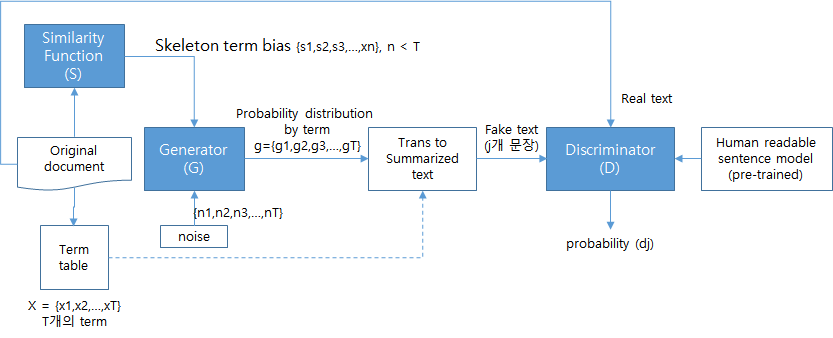 

##3.1 Skeleton term의 추출


Document를 Term 단위로 나눈다. 각각의 Term을 xi 라고 할 때 Document는 다음과 같이 나타낼 수 있다.

Document 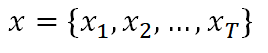

Document의 유사 확률을 측정하는 함수를 S라고 하면, xi 에 대한 유사성 Probability는 다음과 같이 나타낼 수 있다.

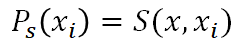

전체 document의 flow는 Similarity Probability Distribution, SPD를 아래와 같이 나타낼 수 있다.

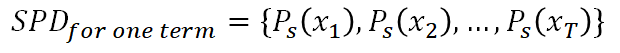

이를 연속적 Signal 이라 보고, Signal의 peak에 해당하는 term을 추출하여 이를 전체 document의 요약에 해당하는 skeleton term으로 구성하고자 한다.


그러나 document story상, 주인공을 지칭하는 term의 경우 전체 Similarity에 지배적 영향을 주게되고 signal의 peak는 해당 term들로만 구성 될 수가 있다. 결국, 원하는 skeleton을 얻지 못하게 된다. 이를 극복하기 위한 방법으로 복수의 term으로 구성된 story line의 SPD를 산출하여 사용한다. 만약 2개의 term인 경우 Similarity Probability는 다음과 같다.

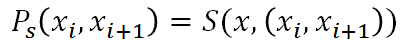

이때, 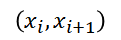 의 구성은 일종의 partial story 로서 filter의 역할을 하고, 전체 document를 convolution 한다.
만약 N개의 term을 filter로 사용한다면, 

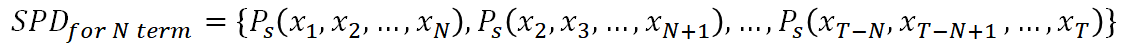

과 같이 된다. 

m개의 filter를 이용하여 skeleton terms = s 를 아래와 같이 구성한다면

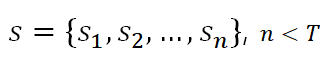

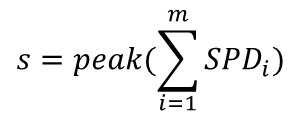

하지만 여기서 문제점은 SPD1~m 에서도 역시 주인공과 같은 지배적 term에 peak가 몰리고 story line에 해당하는 skeleton이 추출되지 못 할 수 있다는 것이다. 이를 극복하기 위해, peak를 추출하기 전에 SPD1의 값을 빼서 지배적 term의 peak를 회피하고 story line에 해당하는 skeleton을 추출 할 수 있도록 한다.

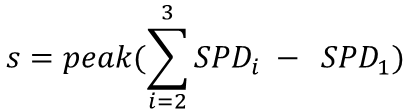

##3.2 Similarity function, S 

*3.2.1 Sentence-BERT

(ref :Nils Reimers and Iryna Gurevych, (2019). Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks ,https://arxiv.org/pdf/1908.10084.pdf)
를 기반으로 구현한다.

BERT (Devlin et al., 2018) is a pre-trained transformer network (Vaswani et al., 2017), which set for various NLP tasks new state-of-the-art results, including question answering, sentence classification, and sentence-pair regression. The input for BERT for sentence-pair regression consists of the two sentences, separated by a special [SEP]
token. Multi-head attention over 12 (base-model) or 24 layers (large-model) is applied and the output is passed to a simple regression function to derive the final label. Using this setup, BERT set a new state-of-the-art performance on the Semantic Textual Semilarity (STS) benchmark (Cer et al.,2017). RoBERTa (Liu et al., 2019) showed, that
the performance of BERT can further improved by small adaptations to the pre-training process. We also tested XLNet (Yang et al., 2019), but it led in general to worse results than BERT.

Sentence-BERT(SBERT), a modification of the pretrained BERT network that use siamese and triplet network structures to derive semantically meaningful sentence embeddings that can be compared using cosine-similarity. This reduces the effort for finding the most similar pair from 65 hours with BERT / RoBERTa to about 5 seconds with SBERT, while maintaining the accuracy from BERT.

SBERT adds a pooling operation to the output of BERT / RoBERTa to derive a fixed sized sentence embedding. We experiment with three pooling strategies: Using the output of the CLS-token, computing the mean of all output vectors (MEAN strategy), and computing a max-over-time of the output vectors (MAX-strategy). The default configuration is MEAN.

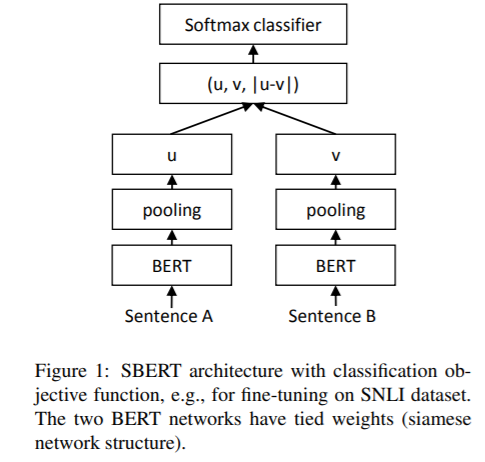

SBERT를 활용할 수 있는 pretrained model은 https://www.sbert.net/docs/pretrained_models.html 여기서 확인 할 수 있다.

본 논문에서는  한국어로 학습된 'xlm-r-large-en-ko-nli-ststb' 모델을 사용하였고, 이 모델의 STS Benchmark score는 84.05% 이다.



##3.3 한국어 문법 Discriminator, D



skeleton terms이 추출된 이후, 개별 skeleton term 사이를 채워 줄 적절한 term을 원문에서 찾아 넣어 주어 사람이 읽을 수 있는 완성된 문장을 만들어야 한다. generator에 의해서 다양한 term을 후보로 채울것이나 이의 적절성 여부를 판단 하는 것이 '한국어 문번 discriminator'이다. 높은 score를 받을 수록 해당 term의 weight를 상승 시켜 결국에는 사람이 읽을 수 있는 요약문장을 만들게 된다.

'한국어 문번 discriminator' 는 한국어 Sample 문서를 수집하여 문장별로 나누어 koNLPy (ref:https://konlpy-ko.readthedocs.io/ko/v0.4.3/)에 의해 형태소 분석을 하여, 최대 길이 128 word, word 별 23 차원의 one-hot ecode하여 (None,128,23)의 shape을 갖는 feature를 구성하여 term이 shuffling된 문장은 label 0, 정상 문장은 label 1로 regression 학습하여 사용한다.

본 논문에서는 장편소설 2개의 text를 사용하여, 총 33,000여개의 문장을 학습하였고 f1-score 약 0.85 수준.

본 '한국어 문번 discriminator'는 LSTM의 적용 등 개선된 알고리즘 및 성능 향상이 더 필요하다.

## 3.4 한국어 Text Generator, G


원문의 전체 term의 개수에 해당하는 random noise를 입력받는다. 2번째 입력은 skeleton term 
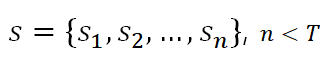
을 bias로서 입력 받는다.
random noise 는 dense layer 몇 개를 거치면서 deep network을 형성하지만 skeleton term bias는 동일 차원의 output 바로 직전에 deep network의 output tensor에 add 된다. 이로서 전체 output은 skeleton term에 bias 되어 원문이 요약된 문장이 생성된다. 또한 random noise에 의해 skeleton term 각각의 사이에 적절한 term이 원문에서 추출 되는 것이다.
 이후, 생성된 probability distribution은 아래의 조건에 의해서 선택되어진다.

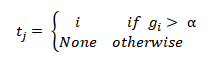

여기서 [알파] 값을 조절 하므로 생성되는 text의 길이를 조절 할 수 있다. 적절한 [알파]값을 통해 문법적으로 읽을 수 있는 글이 생성된다. 
마지막으로 선택된 t vector는 x에서 선택된 order에 해당되거 x[t] 연산에 의해서 text가 생성된다.


전체적인 구성은 아래와 같다. 
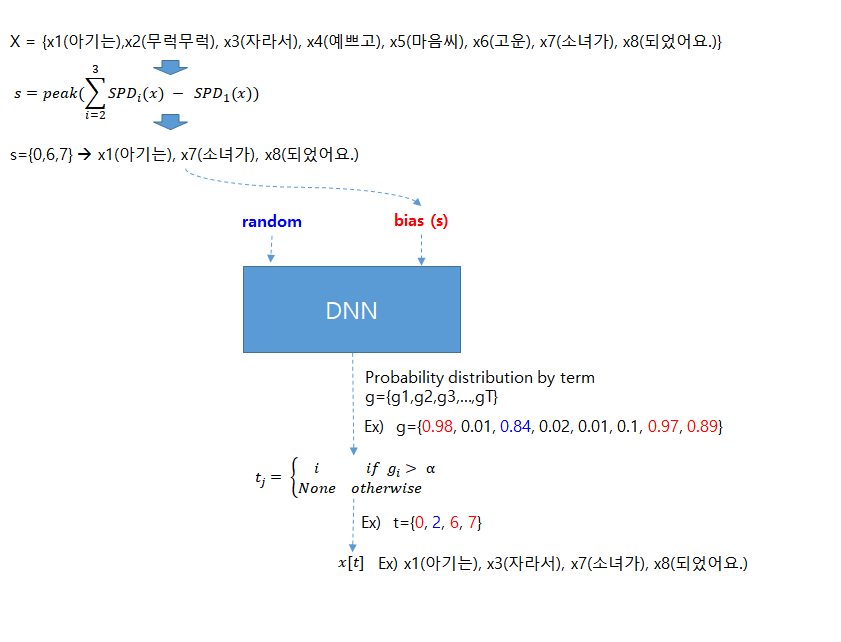

##3.5 GAN Training



GAN의 논문 (ref:Ian J. Goodfellow, (2014). Generative Adversarial Nets, https://arxiv.org/pdf/1406.2661.pdf) 에서 보면 value function V(G,D)에 대하여 다음을 만족시키는 과정에 의하여 학습이 이루어 진다.


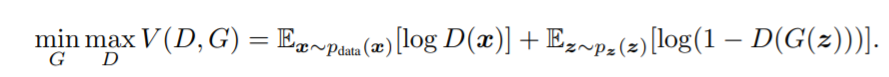

즉, D에 대한 cross-entory 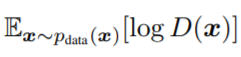 와 G에 대한 cross-entropy 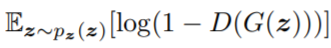 에 대한 최적화의 과정임을 알 수 있다. 

문제는 cross-entropy의 정의에서 보면, 

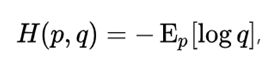

이고, kullback-leibler divergence 으로 표현하면, 

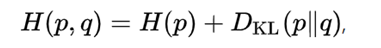

가 된 다. 

문제는 
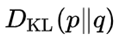

에서 p와 q의 distribution은 동일 차원, 동일 shape을 갖어야 하나 위의 문제에서 G의 output은 (1,T)이고 D의 output은 scalar probability에 해당하여 cross-entropy를 정의 할 수 없다.

즉, 미분을 적용할 수 없는 discrete한 구조로서 GAN 학습이 불가하다. 이러한 문제는 GAN을 통한 Text 생성 알고리즘에서 빈번히 봉착하는 문제이며 논문 (ref : Yau-ShianWang, (2018). Learning to Encode Text as Human-Readable Summaries using Generative Adversarial Networks) 에서는 'Self-Critic Adversarial REINFORCE'을 제안하였다. 해당 기법에서는 Since we feed a discrete sequence ys to the discriminator, the gradient from the discriminator cannot directly back-propagate to the generator. Here, we use the policy gradient method. At timestep i, we use the i 􀀀 1 timestep score si􀀀1 from the discriminator as its self-critical baseline. The reward rD i evaluates whether the quality of sequence in timestep i is better or worse than that in timestep i 􀀀 1. The generator reward rD i from D2 is

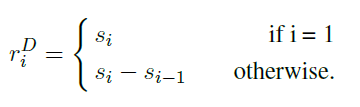

However, some sentences may be judged as bad sentences at the previous timestep, but at later timesteps judged as good sentences, and vice-versa. Hence we use the discounted expected reward d with discount factor  to calculate the discounted reward di at time step i as

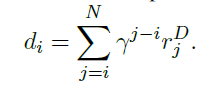

To maximize the expected discounted reward di, the loss of generator is:

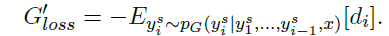

We use the likelihood ratio trick to approximate the gradient to minimize 

하지만 이러한 방식은 LSTM에 의한 timeseries로 접근 할 때 가능하며, discounted reward d의 적용은 loss의 미분 폭이 매우 좁아서, 상당히 많은 시행 (epoch)과정이 필요하다.

따라서 본 논문에서는 이러한 discrete 현상을 해소(G,D의 output shape을 갖게)하기 위해,   

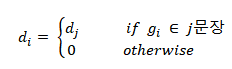

의 과정을 거처 d가 g와 같은 shape을 갖도록 만들고 cross-entory를 정의 할 수 있도록 한다. 결과적으로 우리의 loss는 다음과 같다.

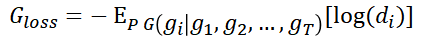

이로서 discrete 현상을 회피할 수 있고, 학습 성능을 향상 할 수 있다.

#4. Implementation


##4.1 기본 설정...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DO_ALL = True # 전체 실행하면서 시간 걸리는 걸 Pass 하려면 이걸 False ...
USE_PRETRAINED_MODEL = True # 이미 학습한 모델을 사용하려면.. true

In [3]:
if DO_ALL:
    !pip install sentence-transformers==0.3.0
    !pip install transformers==3.0.2
    !pip install wikipedia
    !pip install konlpy

     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 1.5MB 7.3MB/s 
     |████████████████████████████████| 890kB 44.3MB/s 
     |████████████████████████████████| 2.9MB 43.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.0-cp36-none-any.whl size=86754 sha256=ec01117818f28d42a3ab84bc5077eaf2b2b58fa4459e34295625e617b2833d12
  Stored in directory: /root/.cache/pip/wheels/b8/23/85/85d6a9a6c68f0625a1ecdaad903bb0a78df058c10cf74f9de4
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=eb55e89d6a0f53cbd54a35c9512b61dfe4641fe539f2c62e9f8c8db7d5a47d53
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses
     |████████████████████████████████| 778kB 5.5MB/s 
     |████████████████████████████████| 1.1MB 18.5MB/s 
     |████████████████████████████████| 3.0MB 28.3MB/s 
  Fo

In [4]:
# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, LSTM, Dense, Dropout,Conv1D, MaxPooling1D, Flatten, Add, LeakyReLU
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential, model_from_json
from tensorflow.python.framework import tensor_shape
import keras.utils as ku 

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input,
                                     Dense, 
                                     BatchNormalization, 
                                     LeakyReLU,
                                     Softmax,
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten,
                                     Concatenate,
                                     Lambda)
import matplotlib.pyplot as plt
# set seeds for reproducability
from tensorflow.random import set_seed
from numpy.random import seed
set_seed(2)
seed(1)

import pandas as pd
import numpy as np
import string, os 

import urllib.request
import nltk
nltk.download('punkt')

from konlpy.tag import Okt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##4.2 한국어 Sample data 수집

In [5]:
# 간단한 전처리
def clean_text(txt):
    txt = txt.replace('\n',' ')
    txt = txt.replace('\r',' ')    
    txt = txt.replace('=','')
    txt = txt.replace('\"','')   
    txt = txt.replace('\'','')
    txt = txt.replace(',','')
    txt = txt.replace('..','')
    txt = txt.replace('.','. ')
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')           
    return txt 

In [6]:
# load ascii text and covert to lowercase

def get_sample_text(target_url):
    raw_text = urllib.request.urlopen(target_url).read().decode('utf-8')
    return nltk.sent_tokenize(clean_text(raw_text))

In [7]:
ko_sentences_dataset = []
if USE_PRETRAINED_MODEL:
    ko_sentences_dataset += get_sample_text("https://raw.githubusercontent.com/dolmani38/Summary/master/data/korean_sample.txt")
    # 여기서 계속 수집...
    ko_sentences_dataset += get_sample_text("https://raw.githubusercontent.com/dolmani38/Summary/master/data/%EC%95%A0%EA%B1%B0%EC%84%9C%ED%81%AC%EB%A6%AC%EC%8A%A4%ED%8B%B0-ABC%20%EC%82%B4%EC%9D%B8%EC%82%AC%EA%B1%B4.txt")

    ko_sentences_dataset += get_sample_text("https://raw.githubusercontent.com/dolmani38/Summary/master/data/%EC%95%A0%EA%B1%B0%EC%84%9C%ED%81%AC%EB%A6%AC%EC%8A%A4%ED%8B%B0-%EA%B7%B8%EB%A6%AC%EA%B3%A0%20%EC%95%84%EB%AC%B4%EB%8F%84%20%EC%97%86%EC%97%88%EB%8B%A4.txt")

In [8]:

# false 문장을 만들기 위해 shffle 함수 준비
import random

def shuffling(txt):
    txt_list = txt.split(' ')
    random.shuffle(txt_list)
    return ' '.join(txt_list)


## 4.3 한국어 문법 Discriminator 구현

###4.3.1 형태소를 feature하는 DNN 모델에 의한 regression 방법

koNLPy로 형태소 분석한 (None,128,23) 을 이용하여 regression 하는 방법.

In [ ]:
# true 문장, false 문장의 생성
ko_grammar_dataset = []

if USE_PRETRAINED_MODEL:
    for txt in ko_sentences_dataset:
        txt = txt.strip()
        if len(txt) > 40:
            #ko_grammar_dataset.append([txt,1])
            txt = txt.replace('.','')
            ko_grammar_dataset.append([txt,1]) # '.'의 위치를 보고 True, False를 판단 하기 땜에...
            ko_grammar_dataset.append([shuffling(txt),0])
        
    # dataset을 전체적으로 다시 썩는다.
    random.shuffle(ko_grammar_dataset)

In [ ]:
okt = Okt()

# 형태소 Code table의 구성

_MAX_MORP_LENGTH = 128
_PADDING_CODE = 0  # padding code
_MISMATCH_CODE = 1 # mismatch word code               ex) @@@
_MISMATCH_WORD = '@@@' # 이거 아래에서 쓴다.

morpheme_table = {}
morp_code = _MISMATCH_CODE+1
morpheme_table['Pad'] = _PADDING_CODE 
morpheme_table['Mst'] = _MISMATCH_CODE 
'''
 Pad               0
 Mst               1
 Noun              2
 Punctuation       3
 Foreign           4
 Josa              5
 Verb              6
 Modifier          7
 Adjective         8
 Suffix            9
 Adverb            10
 Number            11
 Alpha             12
 Determiner        13
 Conjunction       14
 Exclamation       15
 KoreanParticle    16
 URL               17
 VerbPrefix        18
 Eomi              19
 Hashtag           20
 PreEomi           21
'''
morpheme_table['Noun']=2
morpheme_table['Punctuation']=3
morpheme_table['Foreign']=4
morpheme_table['Josa']=5
morpheme_table['Verb']=6
morpheme_table['Modifier']=7
morpheme_table['Adjective']=8
morpheme_table['Suffix']=9
morpheme_table['Adverb']=10
morpheme_table['Number']=11
morpheme_table['Alpha']=12
morpheme_table['Determiner']=13
morpheme_table['Conjunction']=14
morpheme_table['Exclamation']=15
morpheme_table['KoreanParticle']=16
morpheme_table['URL']=17
morpheme_table['VerbPrefix']=18
morpheme_table['Eomi']=19
morpheme_table['Hashtag']=20
morpheme_table['PreEomi']=21
morpheme_table['Email']=22

In [ ]:

print('Korean morpheme code table')
print('----------------------------------------------------------')
print('  Morpheme        Code')
print('')
for morp in morpheme_table.keys():
    print(f' {morp.ljust(15)}   {morpheme_table[morp]}')
print('----------------------------------------------------------')

In [ ]:

# morpheme 코드 변환기 준비
def morpheme_encode(sentence):
    encode=[]
    morphemes = okt.pos(sentence)
    x = np.zeros((_MAX_MORP_LENGTH, len(morpheme_table)), dtype=np.bool)
    for i, (word,morp) in enumerate(morphemes):
        if i < _MAX_MORP_LENGTH:
            code = _MISMATCH_CODE if word==_MISMATCH_WORD else morpheme_table[morp]
            x[i,code] = 1.0   
    return x

ko_morpheme_x = []
ko_morpheme_y = []

if USE_PRETRAINED_MODEL:
    try:
        ko_morpheme_x = np.load('ko_morpheme_x.npy')
        ko_morpheme_y = np.load('ko_morpheme_y.npy')
        print('dataset load from file.')
        print('ko_morpheme_x.shape',ko_morpheme_x.shape)
        print('ko_morpheme_y.shape',ko_morpheme_y.shape)
    except Exception as ex:
        print(ex)
else:
    #true / false 문장을 morpheme 코드로 모두 변환
    tc = len(ko_grammar_dataset)

    for i, (txt,label) in enumerate(ko_grammar_dataset):
        print(f'\r {i+1}/{tc}', end="", flush=True)
        ko_morpheme_x.append(morpheme_encode(txt))
        ko_morpheme_y.append([label])

    ko_morpheme_x = np.asarray(ko_morpheme_x)
    ko_morpheme_y = np.asarray(ko_morpheme_y)
    np.save('ko_morpheme_x',ko_morpheme_x)
    np.save('ko_morpheme_y',ko_morpheme_y)


[Errno 2] No such file or directory: 'ko_morpheme_x.npy'


In [ ]:

from sklearn.model_selection import train_test_split
try: 
    # 20%를 testset으로 사용.,,
    X_train, X_test, y_train, y_test = train_test_split(ko_morpheme_x,ko_morpheme_y,test_size=0.2)

    print(f'Shape of X_train;{X_train.shape}')
    print(f'Shape of X_test ;{X_test.shape}')
    print(f'Shape of y_train;{y_train.shape}')
    print(f'Shape of y_test ;{y_test.shape}')
except Exception as ex:
    print(ex)    

In [ ]:
from keras import backend as K

def r2(y_true, y_pred):
    """
    # custom R2-score metrics for keras backend
    :param y_true: 실측 데이터
    :param y_pred: 모델에 의한 예측 데이테
    :return: R^2 value, 이 값이 높다고 (예:0.99)해서 예측 값이 정확 하다고 할 수 는 없음...
    """
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [ ]:
if USE_PRETRAINED_MODEL:
    model_json_url = "https://raw.githubusercontent.com/dolmani38/Summary/master/models/morpheme_model.json"
    model_weight_url = "https://github.com/dolmani38/Summary/blob/master/models/morpheme_model.h5?raw=true"
    loaded_model_json = urllib.request.urlopen(model_json_url).read().decode('utf-8')
    morpheme_model = model_from_json(loaded_model_json)
    urllib.request.urlretrieve(model_weight_url, "morpheme_model.h5")
    morpheme_model.load_weights("morpheme_model.h5")
    morpheme_model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[r2])
    print('Use pretrained model...')
else:
    # model build
    morpheme_model = Sequential()
    morpheme_model.add(Conv1D(filters=256, kernel_size=4, padding='same',activation='relu',input_shape=(_MAX_MORP_LENGTH, len(morpheme_table))))
    morpheme_model.add(MaxPooling1D(pool_size=2))
    morpheme_model.add(Conv1D(filters=128, kernel_size=4, padding="same",activation='relu'))
    morpheme_model.add(MaxPooling1D(pool_size=2))
    morpheme_model.add(Flatten())
    morpheme_model.add(Dense(128))
    morpheme_model.add(Dense(1, activation='linear'))
    morpheme_model.summary() #Print model Summary

    morpheme_model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[r2])
    hist = morpheme_model.fit(X_train, y_train, epochs=30)

discriminator = morpheme_model

In [ ]:

# 학습결과 확인
try:
    results = morpheme_model.evaluate(X_test, y_test)
    print('mean_squared_error:',results)

    # 학습 결과의 확인
    predicts = morpheme_model.predict(X_test)
    predicts = np.asarray(predicts)
    predicts = [ 1 if x>0.5 else 0 for [x] in predicts]
    y = np.asarray(y_test)
    y = y.reshape(y.shape[0],)

    from sklearn.metrics import classification_report
    print(classification_report(y, predicts))
except Exception as ex:
    print(ex)

In [ ]:
if USE_PRETRAINED_MODEL:
    pass
else:
    model_json = morpheme_model.to_json()
    with open("morpheme_model.json", "w") as json_file:
        json_file.write(model_json)
    json_file.close()
    print("save network to morpheme_model.json")

    morpheme_model.save_weights("morpheme_model.h5")
    print("save weights to morpheme_model.h5")

In [ ]:
def morpheme_discriminator(queries):
    # queries : 복수의 문장의 2차원 배열 (None,1)
    # return : 결과 score 배열 (None,)
    x_codes = []
    for query in queries:
        x_codes.append(morpheme_encode(query))
    scores = morpheme_model.predict(np.array(x_codes))
    return scores #1.0 if scores > 0.5 else 0.0 

In [ ]:
morpheme_discriminator([' 무럭무럭 자라서, 아기는 소녀가 예쁘고 마음씨 고운 되었어요'])

###4.3.2 koBERT에 의한 BertForSequenceClassification 사용 방법

koBERT를 이용하여 transformer의 BertForSequenceClassification 을 이용하는 방법.

#### 4.3.2.1 prepare dataset & train

In [9]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

SystemError: ignored

In [20]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [21]:

# true 문장, false 문장의 생성
# Get the lists of sentences and their labels.
sentences = []
labels = []

if USE_PRETRAINED_MODEL:
    for txt in ko_sentences_dataset:
        txt = txt.strip()
        if len(txt) > 40:
            #ko_grammar_dataset.append([txt,1])
            txt = txt.replace('.','')
            sentences.append(txt) # '.'의 위치를 보고 True, False를 판단 하기 땜에...
            labels.append(1)
            sentences.append(shuffling(txt))
            labels.append(0)

In [22]:
sentences = np.asarray(sentences)
labels = np.asarray(labels)

print(sentences.shape)
print(labels.shape)


(33086,)
(33086,)


* BERT Tokenizer


To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT--the below cell will download this for us. We'll be using the "uncased" version here.

ref : https://github.com/monologg/KoBERT-Transformers


In [23]:
# coding=utf-8
# Copyright 2018 Google AI, Google Brain and Carnegie Mellon University Authors and the HuggingFace Inc. team and Jangwon Park
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
""" Tokenization classes for KoBert model."""


import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [25]:
from transformers import BertTokenizer, AutoTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
# 한국어 pre-trained model을 사용해야 하는데.... 일단 이거 사용 'monologg/kobert'
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

Loading BERT tokenizer...


In [26]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  빌어먹을 이제 겨우 18세인 자신이 벌써 약혼을 하고 일 년 후 결혼을 해야 하다니어이가없다
Tokenized:  ['▁빌', '어', '먹', '을', '▁이제', '▁', '겨', '우', '▁18', '세', '인', '▁자신이', '▁벌써', '▁약', '혼', '을', '▁하고', '▁일', '▁', '년', '▁후', '▁결혼', '을', '▁해야', '▁하다', '니', '어', '이', '가', '없', '다']
Token IDs:  [2549, 6855, 6183, 7088, 3742, 517, 5411, 7005, 547, 6579, 7119, 3914, 2311, 3211, 7931, 7088, 4926, 3803, 517, 5712, 5176, 950, 7088, 5010, 4932, 5770, 6855, 7096, 5330, 6881, 5782]


In [27]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation = True,
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  빌어먹을 이제 겨우 18세인 자신이 벌써 약혼을 하고 일 년 후 결혼을 해야 하다니어이가없다
Token IDs: tensor([   2, 2549, 6855, 6183, 7088, 3742,  517, 5411, 7005,  547, 6579, 7119,
        3914, 2311, 3211, 7931, 7088, 4926, 3803,  517, 5712, 5176,  950, 7088,
        5010, 4932, 5770, 6855, 7096, 5330, 6881, 5782,    3,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1])


In [28]:
# Training & Validation Split
# Divide up our training set to use 90% for training and 10% for validation.

from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

29,777 training samples
3,309 validation samples


In [29]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
# BertForSequenceClassification

from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "monologg/kobert", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# train model

import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [ ]:
#Let's view the summary of the training process.


import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

* model save

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

####4.3.2.2 pretrained grammar check model의 load

In [ ]:

import torch
from transformers import BertForSequenceClassification

output_dir = '/content/drive/MyDrive/Colab\ Notebooks/summary/grammar_check_model'
print('Loading BERT tokenizer...')
tokenizer = KoBertTokenizer.from_pretrained(output_dir)
model_loaded = BertForSequenceClassification.from_pretrained(output_dir)


In [ ]:
# Let's check it for a given sentence
sentences = ["귀여운 여자 아기가 난롯가에 앉아서 울고있어요.","귀여운 여자 아기가 난롯가에 앉아서 울고있어요."]
input_ids = []
attention_masks = []
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 64,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                            truncation = True,
                       )

        # Add the encoded sentence to the list.    
    input_id = encoded_dict['input_ids']

        # And its attention mask (simply differentiates padding from non-padding).
    attention_mask = encoded_dict['attention_mask']
    
    input_ids.append(input_id)
    attention_masks.append(attention_mask)
    
    
    

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model_loaded = model.to(device)
input_id = input_id.to(device)
attention_mask = attention_mask.to(device)

In [ ]:
with torch.no_grad():
  # Forward pass, calculate logit predictions
  outputs = model(input_id, token_type_ids=None, attention_mask=attention_mask)

print(outputs)

logits = outputs[0]

index = logits.argmax()
if index == 1:
  print("Gramatically correct")
else:
  print("Gramatically in-correct")

In [ ]:
def bert_discriminator(sentences):
    
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in sentences:
        # `encode_plus` will:
        #   (1) Tokenize the sentence.
        #   (2) Prepend the `[CLS]` token to the start.
        #   (3) Append the `[SEP]` token to the end.
        #   (4) Map tokens to their IDs.
        #   (5) Pad or truncate the sentence to `max_length`
        #   (6) Create attention masks for [PAD] tokens.
        encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 64,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                            truncation = True,
                       )

        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'])

        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)

    with torch.no_grad():        
        outputs = model(input_ids, 
                               token_type_ids=None, 
                               attention_mask=attention_masks)
    return outputs[0][:,1]

In [ ]:
score = bert_discriminator(['귀여운아기가 난롯가에 앉아서 울고있어요.','나는  학교에 갑니다. 오늘도'])
score

##4.4 한국어 요약 Generator 

###4.4.1 Similarity function

In [ ]:
org_text = """나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데, 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 
말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고, 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다.
사슴은 은혜를 갚겠다고 하면서, 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기, 
선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 
나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다. 
그렇게 잠시간 기다리자 과연, 선녀들이 하늘에서 내려와 날개옷을 벗고 선녀탕에서 목욕을 하는 것이었다. 나무꾼은 사슴이 가르쳐준 대로 날개옷을 하나 훔쳤다.
날개옷이 없어진 탓에 한 명의 선녀는 하늘로 올라가지 못했으며 다른 선녀들은 날개옷이 없는 선녀를 내버려두고 하늘로 돌아갔다. 
이때 나무꾼이 홀로 남은 선녀에게 자신의 아내가 되어달라고 하자, 하늘나라로 올라가지 못하게 된 선녀는 할 수 없이 나무꾼에게 의탁하게 되었다.
"""

In [ ]:
org_text = """옛날 어느 집에 귀여운 여자 아기가 태어났어요.
아기는 무럭무럭 자라서, 예쁘고 마음씨 고운 소녀가 되었어요.
그러던 어느날, 소녀의 어머니가 병이들어 그만 세상을 떠나고 말았어요.
소녀의 아버지는 홀로 남은 소녀가 걱정되었어요.
그래서 얼마 후 새어머니를 맞이했어요.
새어머니는 소녀보다 나이가 위인 두 딸을 데리고 왔어요.
그러나 새어머니와 언니들은 성질이 고약한 심술쟁이들이었어요.
새어머니는 소녀가 자기 딸들보다 예쁘고 착한 게 못마땅했어요.
그런데 이번에는 아버지마저 돌아가셨어요.
소녀는 하녀처럼 하루 종일 쓸고, 닦고, 집안일을 도맡아 했어요.
해도 해도 끝이 없는 집안일이 힘들어 지칠때면
난롯가에 앉아서 잠시 쉬곤 했지요.
"엄마, 저애를 신데렐라라고 불러야겠어요."
"온통 재투성이잖아요. 호호호!" 두 언니는 소녀를 놀려 댔어요.
어느 날, 왕궁에서 무도회가 열렸어요.
신데렐라의 집에도 초대장이 왔어요.
새어머니는 언니들을 데리고 무도회장으로 떠났어요.
신데렐라도 무도회에 가고 싶었어요.
혼자 남은 신데렐라는 훌쩍훌쩍 울기 시작했어요.
"신데렐라, 너도 무도회에 가고 싶니?"
신데렐라가 고개를 들어보니, 마법사 할머니가 빙그레 웃고 있었어요.
"내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴."
마법사 할머니가 주문을 외웠어요.
그리고 지팡이로 호박을 건드리자, 호박이 화려한 황금 마차로 변했어요.
이번에는 생쥐와 도마뱀을 건드렸어요.
그랬더니 생쥐는 흰말로, 도마뱀은 멋진 마부로 변했답니다.
신데렐라의 옷도 구슬 장식이 반짝이는 예쁜 드레스로 바뀌웠어요.
"신데렐라, 발을 내밀어 보거라."
할머니는 신데렐라에게 반짝반짝 빛나는 유리 구두를 신겨 주었어요.
"신데렐라, 밤 열두시가 되면 모든게 처음대로 돌아간단다. 황금 마차는 호박으로, 흰말은 생쥐로, 마부는 도마뱀으로 변하게 돼. 그러니까 반드시 밤 열두 시가 되기 전에 돌아와야 해. 알겠지?"
왕자님도 아름다운 신데렐라에게 마음을 빼았겼어요.
왕자님은 무도회장에 모인 다른 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요.
신데렐라는 왕자님과 춤을 추느라 시간 가는 줄도 몰랐어요.
땡, 땡, 땡...... 벽시계가 열두 시를 알리는 소리에 신데렐라는 화들짝 놀랐어요.
신데렐라가 허둥지둥 왕궁을 빠져나가는데,
유리 구두 한 짝이 벗겨졌어요.
하지만 구두를 주울 틈이 없었어요.
신데렐라를 뛰쫓아오던 왕자님은 층계에서 유리 구두 한 짝을 주웠어요.
왕자님은 유리 구두를 가지고 임금님께 가서 말했어요.
"이 유리 구두의 주인과 결혼하겠어요."
그래서 신하들은 유리 구두의 주인을 찾아 온 나라를 돌아다녔어요.
언니들은 발을 오므려도 보고, 구두를 늘려도 보았지만 한눈에 보기에도 유리 구두는 너무 작았어요.
그때, 신데렐라가 조용히 다가와 말했어요.
"저도 한번 신어 볼 수 있나요?"
신데렐라는 신하게 건넨 유리 구두를 신었어요,
유리 구두는 신데렐라의 발에 꼭 맞았어요.
신하들은 신데렐라를 왕궁으로 데리고 갔어요.
그 뒤 신데렐라는 왕자님과 결혼하여 오래오래 행복하게 살았대요."""

In [ ]:
org_text = clean_text(org_text).strip()
org_text

'나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다. 사슴은 은혜를 갚겠다고 하면서 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다. 그렇게 잠시간 기다리자 과연 선녀들이 하늘에서 내려와 날개옷을 벗고 선녀탕에서 목욕을 하는 것이었다. 나무꾼은 사슴이 가르쳐준 대로 날개옷을 하나 훔쳤다. 날개옷이 없어진 탓에 한 명의 선녀는 하늘로 올라가지 못했으며 다른 선녀들은 날개옷이 없는 선녀를 내버려두고 하늘로 돌아갔다. 이때 나무꾼이 홀로 남은 선녀에게 자신의 아내가 되어달라고 하자 하늘나라로 올라가지 못하게 된 선녀는 할 수 없이 나무꾼에게 의탁하게 되었다.'

In [ ]:
org_sentence_dataset = nltk.sent_tokenize(clean_text(org_text))
org_morpheme_x = []
for sentence in org_sentence_dataset:
    org_morpheme_x.append(morpheme_encode(sentence))
#np.random.choice(5, 3)

def get_org_morpheme_sample(num):
    return np.asarray(org_morpheme_x)[np.random.choice(len(org_morpheme_x), num)]

def get_org_sample(num):
    return np.asarray(org_sentence_dataset)[np.random.choice(len(org_sentence_dataset), num)]


get_org_sample(3).shape

(3,)

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer

if DO_ALL:
    # embedder download...
    embedder = SentenceTransformer('xlm-r-large-en-ko-nli-ststb')

In [ ]:
# 생성된 문장의 원문 유사도를 측정하기 위한 함수

import scipy
#print(doc_emb)
def similarity_discriminator(queries,org_embedding):
    # queries : 복수의 문장의 2차원 배열 (None,1)
    # org_embedding : 비교 대상의 원문 embedding 1차원 배열 (1,)
    # return : 결과 score 배열 (None,)
    total_score = 0
    query_embeddings = embedder.encode(queries,show_progress_bar=False)
    for query, query_embedding in zip(queries, query_embeddings):
        distances = scipy.spatial.distance.cdist([query_embedding], [org_embedding], "cosine")[0]
        results = zip(range(len(distances)), distances)
        for idx, distance in results:
            total_score += 1-distance
    return total_score

In [ ]:

# 원문의 embedding...
org_text_emb = embedder.encode([org_text],show_progress_bar=False)[0]
org_text_emb

array([ 0.3711018 , -0.19225664, -0.25144777, ..., -0.17844199,
        0.41149   ,  0.53386384], dtype=float32)

In [ ]:
org_term_set = (' ' + org_text + ' ').split(' ')

_MAX_GEN_TOKEN = 40
_NOISE_DIM = len(org_term_set)

word_table = {}
#morp_table = {}

for index, word in zip(range(len(org_term_set)),org_term_set):
    word_table[index] = word
    #m = okt.pos(word)
    #morp_table[index] = m[0][1] if len(m) > 0 else ''
    
print('Token table of origin text')
print('---------------------------------------------')
print(' Code     Morp           Token     ')
print('')
for k in word_table.keys():
  #print( f'  {str(k).ljust(5)} {morp_table[k].ljust(10)}  {word_table[k]}')
    print( f'  {str(k).ljust(5)}                  {word_table[k]}')
print('---------------------------------------------')

Token table of origin text
---------------------------------------------
 Code     Morp           Token     

  0                      
  1                      나무꾼이
  2                      나무를
  3                      하다가
  4                      숲
  5                      속에서
  6                      도망치는
  7                      사슴을
  8                      만났는데
  9                      이
  10                     사슴이
  11                     사냥꾼이
  12                     쫓아오고
  13                     있으니
  14                     자신을
  15                     숨겨달라고
  16                     말했다.
  17                     말하는
  18                     사슴을
  19                     신기하게
  20                     여긴
  21                     나무꾼이
  22                     사슴을
  23                     숨겨줬고
  24                     뒤쫓아
  25                     온
  26                     사냥꾼을
  27                     다른
  28                     방향으로
  29                     보내서
  30              

In [ ]:
sota_text = """소녀의 언니들은 심술쟁이들 이었어요. 소녀는 집안일을 도맡아 했어요. 신데렐라도 무도회에 가고 싶었어요. 
마법사 할머니가 주문을 외웠어요. 황금 마차로 드레스로 바뀌웠어요. 밤 열두시가 되면 처음대로 돌아간단다. 
왕자님도 신데렐라에게 마음을 빼았겼어요. 벽시계가 열두 시를 알리는 소리에 놀랐어요. 유리 구두 벗겨졌어요. 
왕자님은 주인을 찾아 돌아다녔어요. 구두는 신데렐라의 발에 맞았어요."""

In [ ]:
print('Similarity of sota:',similarity_discriminator([sota_text],org_text_emb))

Similarity of sota: 0.3937315377549393


In [ ]:
# Print iterations progress
class ProgressBar:

    def __init__(self,total=20, prefix = '', suffix = '', decimals = 1, length = 20, fill = '|', printEnd = "\r"):
        self.total = total
        self.prefix = prefix
        self.suffix = suffix
        self.decimals = decimals
        self.length = length
        self.fill = fill
        self.printEnd = printEnd
        self.ite = 0

    def printProgress(self,iteration, text):
        self.ite += iteration
        percent = ("{0:." + str(self.decimals) + "f}").format(100 * (self.ite / float(self.total)))

        filledLength = int(self.length * self.ite // self.total)
        bar = self.fill * filledLength + '.' * (self.length - filledLength)
        print(f'\r{self.prefix} |{bar}| {percent}% {self.suffix}  {text}', end="", flush=True)
        # Print New Line on Complete
        if self.ite == self.total: 
            print()

###4.4.2 Skeleton term의 추출

In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram


# weight 들의 초기화
terms = np.array(list(word_table.values()))

story_filters=np.array([[0,1],[0,1,2],[0,1,2,3]]) # ,[0,1,2,3,4],[0,2,4,6]])#,[0,2],[0,2,4],[0,2,4,6],[0,2,4,6,8]])
word_filters=np.array([[0]])

story_weights = np.zeros(_NOISE_DIM,)
word_weights = np.zeros(_NOISE_DIM,)

#filters=np.array([[0,2],[0,2,4],[0,2,4,6],[0,2,4,6,8]])
#filters=np.array([[0,1,2,3,4,5]])
terms = np.array(list(word_table.values()))
#morps = np.array(list(morp_table.values()))

# story에 지배적인 word를 찾는다.

# 먼저 word의 강세 분석
for filter in word_filters:
    #print(filter)
    last_idx = len(terms)-(max(filter)+1)
    pb = ProgressBar(last_idx,prefix='word density scan :')
    for conv in range(last_idx,0,-1):
        pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
        t = np.array(filter) + conv
        '''
        w = terms[t][0]
        if w.endswith('.'):  # '.'으로 끝나는 동사 - '술어' 는 대부분 스토리상중요한 내용 포함. 하여... 이건 제외 단어에서 skip시킴
            score = 0.0
        else:
            #part_sen = ' '.join(terms[t]) 
            #score = similarity_discriminator([part_sen],org_text_emb)
            score = similarity_discriminator([w],org_text_emb)
        '''
        '''
        if morps[t][0] in ('Adjective ','Adverb','Conjunction'):
            pass
        else:
            part_sen = ' '.join(terms[t]) 
            score = similarity_discriminator(part_sen.strip(),org_text_emb)
            word_weights[t] += score
        '''            
        part_sen = ' '.join(terms[t]) 
        score = similarity_discriminator(part_sen.strip(),org_text_emb)
        word_weights[t] += score
        
# story의 강세 분석
for filter in story_filters:
    #print(filter)
    last_idx = len(terms)-(max(filter)+1)
    pb = ProgressBar(last_idx,prefix='story density scan:')
    for conv in range(last_idx,0,-1):
        pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
        t = np.array(filter) + conv
        part_sen = ' '.join(terms[t]) 
        score = similarity_discriminator([part_sen],org_text_emb)
        story_weights[t] += score

#각각의 peak를 산출
word_peaks, _ = find_peaks(word_weights, height=0)
story_peaks, _ = find_peaks(story_weights, height=0)

#두개의 peak가 겹치는 word에 대해 한개 word가 유사도에 미치는 영향이 큰것으로 간주
#해당 word를 유사도 판단 필터에서 제외하고 다시 필터링...
#이를 통해 story에 대한 word를 최대한 추출 한다.

dup_order = []
for i in range(_NOISE_DIM):
    #lst = ""
    if (i in word_peaks) and (i in story_peaks):
        if terms[i].endswith('.'):
            pass
        else:
            dup_order.append(i)
# Story에 대한 weight을 추출하기 위해, word에 유독 강세가 있는 term을 제외 시킨다.
print('Negative words:',terms[dup_order])
terms[dup_order] = '---'
'''
print('Token table of origin text')
print('---------------------------------------------')
print(' Code         Token      ')
print('')
for index, word in zip(range(len(terms)),terms):
    print( f'  {str(index).ljust(8)}    {word}')
print('---------------------------------------------')
'''
story_weights = np.zeros(_NOISE_DIM,)
# 그리고 다시 story 분석 스캔
for filter in story_filters:
    #print(filter)
    last_idx = len(terms)-(max(filter)+1)
    pb = ProgressBar(last_idx,prefix='story density scan:')
    for conv in range(last_idx):
        pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
        t = np.array(filter) + conv
        part_sen = ' '.join(terms[t]) 
        part_sen = part_sen.replace('소녀','---')
        score = similarity_discriminator([part_sen],org_text_emb)
        story_weights[t] += score

word density scan : |||||||||||||||||||||| 100.0%   filer:[0] 1/129        
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1] 1/128        
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2] 1/127        
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2, 3] 1/126        
Negative words: ['사슴을' '사슴을' '사슴을' '사슴은' '나무꾼에게' '훔쳐' '나무꾼에게' '사슴이' '벗고' '사슴이' '나무꾼이'
 '나무꾼에게']
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1] 127/128       
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2] 126/127       
story density scan: |||||||||||||||||||||| 100.0%   filer:[0, 1, 2, 3] 125/126       


[  4  11  21  24  26  33  39  43  47  51  58  65  71  76  78  85  93 102
 105 114 120 128]


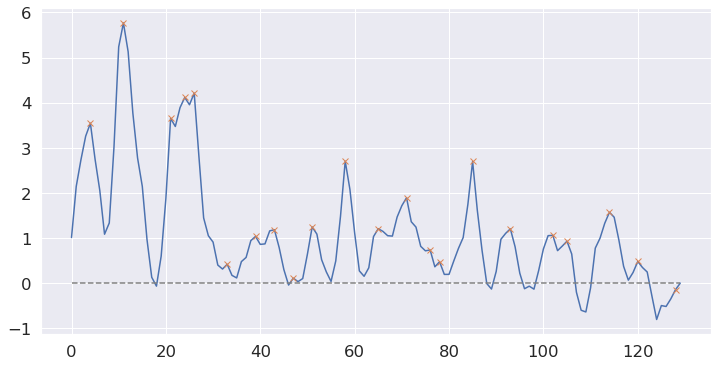

Peak count: 22


In [ ]:

# base line
base_line = 0.0
# 다시 peak 추출
story_peaks, _ = find_peaks(story_weights, height=base_line)
story_peaks = np.append(story_peaks,len(story_weights)-2)
print(story_peaks)
# story density 표출
plt.figure(figsize=(12, 6))
plt.plot(story_weights)
plt.plot(story_peaks, story_weights[story_peaks], "x")
plt.plot(np.zeros_like(story_weights)+base_line, "--", color="gray")
plt.show() 
print('Peak count:',len(story_peaks))

In [ ]:

# story skeleton 추출
skel_text = ""
for k in story_peaks:
    #print(k,term_weight[k],word_table[k])
    skel_text += word_table[k]+' '  

print(skel_text)
print('')
print(f'Peak count:{len(story_peaks)}   Similarity : {similarity_discriminator([skel_text],org_text_emb)}')

숲 사냥꾼이 나무꾼이 뒤쫓아 사냥꾼을 갚겠다고 목욕하는 목욕을 선녀의 아내로 나무꾼은 목욕을 숨겼다. 선녀들이 내려와 나무꾼은 없어진 선녀들은 선녀를 자신의 못하게 되었다. 

Peak count:22   Similarity : 0.7400025861278826


In [ ]:
for index, word in zip(range(len(org_term_set)),org_term_set):
    word_table[index] = word
    
print('Token table of origin text')
print('---------------------------------------------')
print(' Code     Score        Token              ')
print('')
for k in word_table.keys(): 
  print( f'  {str(k).ljust(5)}   {str(round(story_weights[k],4)).ljust(8)}  {word_table[k]}')
print('---------------------------------------------')

Token table of origin text
---------------------------------------------
 Code     Score        Token              

  0       1.0106    
  1       2.1436    나무꾼이
  2       2.7355    나무를
  3       3.2579    하다가
  4       3.5454    숲
  5       2.7416    속에서
  6       2.0499    도망치는
  7       1.0844    사슴을
  8       1.3335    만났는데
  9       3.017     이
  10      5.2377    사슴이
  11      5.7677    사냥꾼이
  12      5.1314    쫓아오고
  13      3.7684    있으니
  14      2.7738    자신을
  15      2.1454    숨겨달라고
  16      0.9635    말했다.
  17      0.1297    말하는
  18      -0.0664   사슴을
  19      0.5978    신기하게
  20      1.8763    여긴
  21      3.6514    나무꾼이
  22      3.4731    사슴을
  23      3.8915    숨겨줬고
  24      4.1165    뒤쫓아
  25      3.9547    온
  26      4.2119    사냥꾼을
  27      2.8076    다른
  28      1.4461    방향으로
  29      1.0509    보내서
  30      0.909     구해주었다.
  31      0.4012    사슴은
  32      0.3125    은혜를
  33      0.4176    갚겠다고
  34      0.1729    하면서
  35      0.1153    나무꾼에게
  36      0

In [ ]:

# text의 생성
def text_gen(noise, term_length):
    gtext = []
    sorted_noise = np.sort(noise)[::-1]
    order = np.where(noise > sorted_noise[term_length+1])[0][-term_length:]
    assert len(order) == term_length
    for k in order:
        gtext.append((word_table[k],k))
        #text += word_table[k]+' '    
    return gtext 

###4.4.3 Generator model의 생성

In [ ]:
# 효과적으로 구성된 것인지는 모르겠음... 이것은 아직 많은 연구가 필요함.
# 또한 LSTM으로 바꾸어 길이의 한게를 극복해야 할 것...

def make_generator_model(term_length):
    input = Input(shape=(term_length), dtype='float64') 
    bias_input = Input(shape=(term_length), dtype='float64') 
    output = Dense(term_length*2, use_bias=False)(input)
    output = LeakyReLU(0.2)(output)
    output = Dense(term_length*4, use_bias=False)(output)
    output = LeakyReLU(0.2)(output)
    #output = Dense(term_length, use_bias=False,activation='linear')(output)
    output = Dense(term_length, use_bias=False,activation='sigmoid')(output)
    output = Add()([output, bias_input])
    model = Model([input,bias_input],output)
    
    model.summary()
    return model


In [ ]:
generator = make_generator_model(_NOISE_DIM)

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 130)]        0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 260)          33800       input_17[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_16 (LeakyReLU)      (None, 260)          0           dense_24[0][0]                   
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 520)          135200      leaky_re_lu_16[0][0]             
______________________________________________________________________________________

##4.5 Cross-entropy를 구성하기 위한 Discriminator output 변환 function

In [ ]:
def discrete_discriminator2(weights,term_length,verbose=0):
    fake_gen_out = np.zeros(weights.shape)
    real_morphemes = get_org_morpheme_sample(weights.shape[0])
    fake_morps = []
    real_morps = []
    apply_order = []
    for i, noise in enumerate(weights):
        gtext = text_gen(noise,term_length)
        tw = ""
        tk = []
        fake_scores = []
        for (w,k) in gtext:
            tw += w + ' '
            tk.append(k)
            if w.endswith('.'):
                fake_morps.append(morpheme_encode(tw))
                real_morps.append(real_morphemes[i])
                apply_order.append((i,tk))
                tw = ""
                tk = []
                
        if len(tk) > 0:
            fake_morps.append(morpheme_encode(tw))
            real_morps.append(real_morphemes[i])
            apply_order.append((i,tk))

    fake_dis_out=discriminator(np.asarray(fake_morps))
    real_dis_out=discriminator(np.asarray(real_morps))
    for j, (i,tk) in enumerate(apply_order):
        fake_gen_out[i,tk] += fake_dis_out[j].numpy()

    return tf.constant(fake_gen_out,tf.float64), fake_dis_out, real_dis_out

In [ ]:
def discrete_discriminator3(weights,term_length,verbose=0):
    fake_gen_out = np.zeros(weights.shape)
    real_text = get_org_sample(weights.shape[0])
    fake_outs = []
    real_outs = []
    apply_order = []
    for i, noise in enumerate(weights):
        gtext = text_gen(noise,term_length)
        tw = ""
        tk = []
        fake_scores = []
        for (w,k) in gtext:
            tw += w + ' '
            tk.append(k)
            if w.endswith('.'):
                fake_outs.append(tw.strip())
                real_outs.append(real_text[i])
                apply_order.append((i,tk))
                tw = ""
                tk = []
                
        if len(tk) > 0:
            fake_outs.append(tw.strip())
            real_outs.append(real_text[i])
            apply_order.append((i,tk))

    fake_dis_out=bert_discriminator(fake_outs)
    real_dis_out=bert_discriminator(real_outs)
    for j, (i,tk) in enumerate(apply_order):
        #fake_gen_out[i,tk] += fake_dis_out[j].numpy() --> 이거는 tf 용...
        fake_gen_out[i,tk] += fake_dis_out[j].cpu().detach().numpy()

    #return tf.constant(fake_gen_out,tf.float64), fake_dis_out, real_dis_out
    # --> torch.tensor 로 수정 해야...
    
    return tf.constant(fake_gen_out,tf.float64), fake_dis_out, real_dis_out

In [ ]:
N = 1
count = tf.Variable(1.0)
tf_term_weight = tf.zeros([_NOISE_DIM])
noise = np.random.rand(N,_NOISE_DIM)
biased_noise = np.random.rand(N,_NOISE_DIM)
# stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
biased_noise[:,story_peaks] += np.mean(noise) 

In [ ]:
sw = generator([noise,biased_noise], training=False)
sw

<tf.Tensor: shape=(1, 340), dtype=float32, numpy=
array([[ 6.02345288e-01,  5.90184987e-01,  4.71650660e-01,
         1.07953930e+00,  7.51483798e-01,  7.34965026e-01,
         1.44104362e-01,  1.08915651e+00,  3.07381123e-01,
         1.18944240e+00,  1.06582105e+00,  5.67496836e-01,
         2.32763082e-01,  2.44994611e-01,  9.16293025e-01,
         6.94302320e-01,  7.54362822e-01,  2.53780521e-02,
         2.29036063e-01,  7.06784666e-01,  1.16615236e+00,
         4.24595058e-01,  6.45502806e-02,  1.08672988e+00,
         1.12577960e-01,  7.77800083e-01,  4.99900669e-01,
         1.33812463e+00,  3.81798267e-01,  8.49308848e-01,
         9.91540432e-01,  4.42751497e-01,  9.93483484e-01,
         1.07695147e-01,  6.28783822e-01,  8.52825999e-01,
         3.28905702e-01,  2.15323746e-01,  1.20282757e+00,
         4.23714370e-01,  3.79756719e-01,  8.21706295e-01,
        -9.34823453e-02,  2.25381821e-01,  5.42480886e-01,
         8.87947798e-01,  5.68398118e-01,  9.55811381e-01,
      

In [ ]:
# skeleton_length + N%의 길이로 생성
gen_length = len(story_peaks) + int(len(story_peaks)*1.0)
sw = generator([noise,biased_noise], training=False)
#fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator2(sw,gen_length,verbose=0)
fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator3(sw,gen_length,verbose=0)
print(fake_gen_out)
print(fake_dis_out)
print(real_dis_out)

tf.Tensor(
[[ 0.          0.          0.          0.          0.          0.
   0.          1.44418728  0.          2.00751114  2.00751114  0.
   0.          0.          2.00751114  0.          0.          0.
   0.          0.          2.00751114  0.          0.          2.00751114
   0.          2.00751114  0.          2.00751114  0.          2.00751114
   2.00751114  0.         -1.98603404  0.          0.         -1.98603404
   0.          0.         -3.5452733   0.          0.         -3.5452733
   0.          0.          0.         -3.5452733   0.         -3.5452733
   0.         -3.5452733   0.          0.          0.          0.
   0.          0.          0.          2.52224541  0.          0.
   0.          0.          0.          1.86804318  0.          0.
   0.          0.          0.          1.86804318  0.          0.
   0.          0.          1.86804318  0.          0.          0.
   0.          0.          0.          1.86804318  0.          1.86804318
   0.          1.86

##4.6 GAN Traning...

In [ ]:
## generator의 학습!!!

def train(epochs=10,batch_size=10):
    # In the Deepmind paper they use RMSProp however then Adam optimizer
    # improves training time
    generator_optimizer = tf.keras.optimizers.Adam(1e-4)
    # This method returns a helper function to compute cross entropy loss
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    gen_length = len(story_peaks) + int(len(story_peaks)*0.6)
    pb = ProgressBar(epochs,prefix='Train...')
    gen_loss_history = []
    dis_loss_history = []    
    for i in range(epochs):
        noise = np.random.rand(batch_size,_NOISE_DIM)
        biased_noise = np.random.rand(batch_size,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
        biased_noise[:,story_peaks] += np.mean(noise)

        with tf.GradientTape() as tape:
        
            sw = generator([noise,biased_noise], training=True)
            fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator2(sw,gen_length)
        
            gen_loss = cross_entropy(fake_gen_out, sw)

            # 진짜를 넣은 것에 대한 output
            real_loss = cross_entropy(tf.ones_like(real_dis_out), real_dis_out)
            fake_loss = cross_entropy(tf.zeros_like(fake_dis_out), fake_dis_out)
            dis_loss = real_loss + fake_loss

        # Backpropagation
        dis_grads = tape.gradient(dis_loss, discriminator.trainable_variables)
        generator_optimizer.apply_gradients(zip(dis_grads, discriminator.trainable_variables))


        noise = np.random.rand(batch_size,_NOISE_DIM)
        biased_noise = np.random.rand(batch_size,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
        biased_noise[:,story_peaks] += np.mean(noise)

        with tf.GradientTape() as tape:
            sw = generator([noise,biased_noise], training=True)
            fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator2(sw,gen_length)
            gen_loss = cross_entropy(fake_gen_out, sw)

        gen_grads = tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))

        gen_loss_history.append(gen_loss)
        dis_loss_history.append(dis_loss)

        pb.printProgress(+1,f'{i+1}/{epochs} epochs, gen_loss:{gen_loss}, dis_loss:{dis_loss}             ')

    return  {'gen_loss':gen_loss_history,'dis_loss':dis_loss_history}

In [ ]:
def genere_summary(count):
    texts = []
    gen_length = len(story_peaks) + int(len(story_peaks)*1.0)
    noise = np.random.rand(count,_NOISE_DIM)
    biased_noise = np.random.rand(count,_NOISE_DIM)
    # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
    biased_noise[:,story_peaks] += np.mean(noise)
    sw = generator.predict([noise,biased_noise])
    for noise in sw:
        gtext = text_gen(noise,gen_length)
        text = ' '.join([w for (w,k) in gtext])
        #print(text)
        texts.append(text)
    return texts


In [ ]:
a = np.array([[0,1,2,3,4,5,6,7,8,9]])

from sklearn.preprocessing import normalize
b = normalize(a, norm='max')

print(a)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
[[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]]


In [ ]:
## generator의 학습!!! --> torch 용... 먼저, D의 학습은 제외하고, G의 학습만... Try!
from sklearn.preprocessing import normalize

def train2(epochs=10,batch_size=10):
    # In the Deepmind paper they use RMSProp however then Adam optimizer
    # improves training time
    generator_optimizer = tf.keras.optimizers.Adam(1e-4)
    # This method returns a helper function to compute cross entropy loss
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    gen_length = len(story_peaks) + int(len(story_peaks)*1.0)
    pb = ProgressBar(epochs,prefix='Train...')
    gen_loss_history = []
    dis_loss_history = []    
    
    model.eval()          #evaluation 모드로 전환
    
    for i in range(epochs):
        noise = np.random.rand(batch_size,_NOISE_DIM)
        
        # bias를 주지 않을 경우...????
        #biased_noise = np.zeros((batch_size,_NOISE_DIM)) 
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
        biased_noise = np.random.rand(batch_size,_NOISE_DIM)
        biased_noise[:,story_peaks] += np.mean(noise) * 2  #--> 강하게 주기!
        # 그리고 normailization 한다!
        biased_noise = normalize(biased_noise, norm='max')

        with tf.GradientTape() as tape:
        
            sw = generator([noise,biased_noise], training=True)
            fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator3(sw,gen_length)
        
            gen_loss = cross_entropy(fake_gen_out, sw)
            '''
            # 진짜를 넣은 것에 대한 output
            real_loss = cross_entropy(tf.ones_like(real_dis_out), real_dis_out)
            fake_loss = cross_entropy(tf.zeros_like(fake_dis_out), fake_dis_out)
            dis_loss = real_loss + fake_loss
            '''
            
            
        # Backpropagation
        '''
        dis_grads = tape.gradient(dis_loss, discriminator.trainable_variables)
        generator_optimizer.apply_gradients(zip(dis_grads, discriminator.trainable_variables))


        noise = np.random.rand(batch_size,_NOISE_DIM)
        biased_noise = np.random.rand(batch_size,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
        biased_noise[:,story_peaks] += np.mean(noise)

        with tf.GradientTape() as tape:
            sw = generator([noise,biased_noise], training=True)
            fake_gen_out, fake_dis_out, real_dis_out = discrete_discriminator2(sw,gen_length)
            gen_loss = cross_entropy(fake_gen_out, sw)
        '''
        gen_grads = tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))

        gen_loss_history.append(gen_loss)
        #dis_loss_history.append(dis_loss)

        pb.printProgress(+1,f'{i+1}/{epochs} epochs, gen_loss:{gen_loss}            ')

    return  {'gen_loss':gen_loss_history}

In [ ]:
history = train2(epochs=200,batch_size=10)

Train... |||||||||||||||||||||| 100.0%   200/200 epochs, gen_loss:0.24244184792041779              


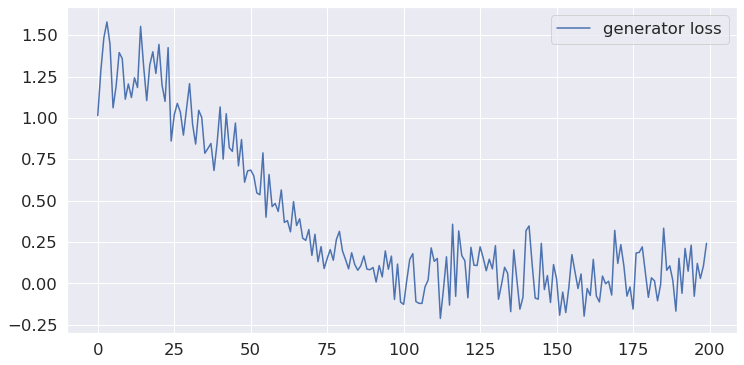

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history['gen_loss'],label='generator loss')
#plt.plot(history['dis_loss'],label='discriminator loss')
plt.legend()
plt.show() 

In [ ]:
texts = genere_summary(10)
for txt in texts:
    print('text:',txt)
print('skel:',skel_text)

text: 속에서 만났는데 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 사슴을 나무꾼이 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다. 목욕을 선녀의 아내로 과연 선녀들이 하늘에서 내려와 벗고 나무꾼은 사슴이 하나 없어진 한 올라가지 선녀들은 선녀를 내버려두고 이때 나무꾼이 선녀에게 자신의 올라가지 못하게 의탁하게 되었다.
text: 만났는데 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 사슴을 나무꾼이 뒤쫓아 사냥꾼을 다른 방향으로 보내서 구해주었다. 갚겠다고 내려와서 목욕을 목욕을 과연 선녀들이 하늘에서 내려와 선녀탕에서 나무꾼은 사슴이 하나 없어진 한 올라가지 선녀들은 선녀를 내버려두고 이때 나무꾼이 선녀에게 자신의 올라가지 못하게 된 의탁하게 되었다.
skel: 숲 사냥꾼이 나무꾼이 뒤쫓아 사냥꾼을 갚겠다고 목욕하는 목욕을 선녀의 아내로 나무꾼은 목욕을 숨겼다. 선녀들이 내려와 나무꾼은 없어진 선녀들은 선녀를 자신의 못하게 되었다. 
